In [ ]:
#Import the basic libraries to get started with EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Part 2 - PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [ ]:
df=pd.read_excel(r"C:\Users\lavan\OneDrive\Desktop\PCA India Data_Census.xlsx")

In [ ]:
#Check the first few observations
df.head()

In [ ]:
df.shape

In [ ]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
# Identify categorical columns (excluding numerical and datetime)
categorical_cols = df.select_dtypes(exclude=['number', 'datetime64[ns]']).columns.tolist()


# Count the number of numerical, , and categorical columns
num_numerical_cols = len(numerical_cols)

num_categorical_cols = len(categorical_cols)

print("Numerical Columns:")
print(numerical_cols)
print("\nNumber of Numerical Columns:", num_numerical_cols)



print("\nCategorical Columns:")
print(categorical_cols)
print("\nNumber of Categorical Columns:", num_categorical_cols)



In [ ]:
df.info()

In [ ]:
#Check for presence of duplicate rows
df.duplicated().sum()

In [ ]:
# Find and count null records in each column
null_counts = df.isnull().sum()

# Display the columns with their respective counts of null records
print("Null Records per Column:")
print(null_counts)

In [ ]:
total_null_count = null_counts.sum()
print("Total Null Records:", total_null_count)

To perform PCA for studying "Female Headed Households Excluding Institutional Households," we want to retain the columns that are most relevant to our analysis and drop any columns that are not informative or are not relevant to our research question.

We can drop the following columns:

'State Code' and 'Dist.Code': These columns appear to be identifiers for the state and district, which may not be directly related to the characteristics of female-headed households. They are more like geographical identifiers.

'State' and 'Area Name': If 'Area Name' is similar to 'Area Type' or indicates the type of area (e.g., rural, urban), and 'State' indicates the state where the data is collected, you might want to exclude them as well, as they may not be the primary focus of your analysis.

In [ ]:
#Drop all columns other than the ones suitable for PCA
df_pca = df.drop(['State Code', 'Dist.Code', 'State', 'Area Name'], axis = 1)

In [ ]:
#Dataframe suitable for PCA
df_pca.head(10)

In [12]:
#Check the number of features
len(df_pca.columns)

57

In [ ]:
# List of columns for which you want to find outliers
columns_to_check = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F', 'MAIN_OT_M', 'MAIN_OT_F', 'MARGWORK_M', 'MARGWORK_F', 'MARG_CL_M', 'MARG_CL_F', 'MARG_AL_M', 'MARG_AL_F', 'MARG_HH_M', 'MARG_HH_F', 'MARG_OT_M', 'MARG_OT_F', 'MARGWORK_3_6_M', 'MARGWORK_3_6_F', 'MARG_CL_3_6_M', 'MARG_CL_3_6_F', 'MARG_AL_3_6_M', 'MARG_AL_3_6_F', 'MARG_HH_3_6_M', 'MARG_HH_3_6_F', 'MARG_OT_3_6_M', 'MARG_OT_3_6_F', 'MARGWORK_0_3_M', 'MARGWORK_0_3_F', 'MARG_CL_0_3_M', 'MARG_CL_0_3_F', 'MARG_AL_0_3_M', 'MARG_AL_0_3_F', 'MARG_HH_0_3_M', 'MARG_HH_0_3_F', 'MARG_OT_0_3_M', 'MARG_OT_0_3_F', 'NON_WORK_M', 'NON_WORK_F']

# Iterate through the columns and count outliers using the IQR method
for column_name in columns_to_check:
    # Calculate the quartiles
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    num_outliers = ((df[column_name] < lower_bound) | (df[column_name] > upper_bound)).sum()

    # Print the column name and the count of outliers
    print(f"Number of outliers in '{column_name}': {num_outliers}")


In [ ]:
# Check for presence of outliers in each feature
plt.figure(figsize=(16, 36))  # Adjust the figure size as needed
feature_list = df_pca.columns

# Calculate the number of rows and columns needed based on the number of features
num_rows = len(feature_list) // 4 + (len(feature_list) % 4 > 0)
num_cols = min(len(feature_list), 4)

for i in range(len(feature_list)):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df_pca[feature_list[i]], data=df_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

plt.show()


In [15]:
#Check the descriptive stats to observe scale issues between the variables
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0
F_ST,640.0,10155.640625,15875.701488,0.0,429.50,3834.5,12480.25,130119.0
M_LIT,640.0,57967.979688,55910.282466,286.0,21298.00,42693.5,77989.50,403261.0


In [16]:
#Scale the data
from scipy.stats import zscore
df_pca_scaled = df_pca.apply(zscore)

In [17]:
#Check the data post scaling
df_pca_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,...,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738,-0.958575,-0.957049,-0.423306,-0.476423,-0.798097,...,-0.163229,-0.720610,-0.156494,-0.287524,0.156577,-0.657412,-0.365258,-0.499977,-0.413053,-0.539614
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367,-0.958297,-0.956772,-0.582014,-0.607607,-0.849434,...,-0.583103,-0.732811,-0.282327,-0.294688,-0.491731,-0.723062,0.042855,-0.073481,-0.606455,-0.598988
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262,-0.958575,-0.956772,-0.038951,-0.027273,-0.956457,...,-0.859212,-0.921931,-0.456727,-0.420050,-0.731894,-0.795026,-0.662068,-0.635680,-0.726103,-0.707839
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393,-0.958783,-0.957049,-0.355965,-0.390060,-1.004643,...,-0.805468,-0.900758,-0.419198,-0.385127,-0.718770,-0.784926,-0.624966,-0.616294,-0.645791,-0.710038
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908,-0.957395,-0.955529,0.149238,0.043330,-0.800568,...,-0.348645,-0.297513,0.472670,0.434200,-0.466796,-0.625849,-0.439461,-0.309346,-0.540895,-0.249344


In [ ]:
# Check for presence of outliers in each feature
plt.figure(figsize=(16, 36))  # Adjust the figure size as needed
feature_list =df_pca_scaled .columns

# Calculate the number of rows and columns needed based on the number of features
num_rows = len(feature_list) // 4 + (len(feature_list) % 4 > 0)
num_cols = min(len(feature_list), 4)

for i in range(len(feature_list)):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=df_pca[feature_list[i]], data=df_pca)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

plt.show()


Here's how scaling can affect outliers in boxplots:

No Scaling (Original Data): In boxplots created from the original unscaled data, outliers may appear as individual data points that are far from the central box region. These outliers can be easily identified.

Scaling (e.g., Z-score Scaling): When data is scaled by using Z-score scaling, it adjusts the range and distribution of values. Outliers are still exist after scaling, but they  have Z-score values greater than a certain threshold (e.g., ±3 standard deviations from the mean). As a result, some original outliers may be brought within the range of the boxplot, and they might not appear as outliers anymore. New outliers may also emerge, but they will now be defined based on the scaled values.

So scaling doesn't remove outliers from the data; it can change how they are visually represented and potentially redefine what is considered an outlier based on the scaling method used. 



Part 2 - PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

In [31]:
import numpy as np

# Calculate the covariance matrix for the scaled data
covariance_matrix = np.cov(df_pca_scaled, rowvar=False)

# Print or analyze the covariance matrix as needed
print(covariance_matrix)


[[1.00156495 0.91760364 0.97210871 ... 0.53769433 0.76357722 0.73684378]
 [0.91760364 1.00156495 0.98417823 ... 0.5891007  0.84621844 0.71718181]
 [0.97210871 0.98417823 1.00156495 ... 0.572748   0.82894851 0.74775097]
 ...
 [0.53769433 0.5891007  0.572748   ... 1.00156495 0.61052325 0.52191235]
 [0.76357722 0.84621844 0.82894851 ... 0.61052325 1.00156495 0.88228018]
 [0.73684378 0.71718181 0.74775097 ... 0.52191235 0.88228018 1.00156495]]


In [32]:
#Confirm the statistical significance of correlations
#H0: Correlations are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_pca_scaled)
p_value

C:\Users\lavan\AppData\Roaming\Python\Python310\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


0.0

As we  are getting a p-value of 0 as the output when performing a Bartlett's test of sphericity, it typically means that the correlations among our variables is very strong. Also the assumption of sphericity (independence of variables) has been violated, and there is evidence of correlations among your variables.

In [33]:
#Confirm the adequacy of sample size. 
#Note: Above 0.7 is good, below 0.5 is not acceptable
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_pca_scaled)
kmo_model

C:\Users\lavan\AppData\Roaming\Python\Python310\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.8039889932781996

The Kaiser-Meyer-Olkin (KMO) test is used to assess the adequacy of the sample size.It measures the proportion of variance among variables that might be caused by underlying factors. We  have obtained a KMO model value of approximately 0.838. This is a good KMO value, as it is well above the threshold of 0.7, which is often considered a minimum value for factor analysis to be considered appropriate. A KMO value of 0.838 suggests that  dataset is highly suitable for further analysis, and the variables in  dataset share a substantial amount of common variance that can be explained by underlying factors.

In [34]:
#Apply PCA taking all features
from sklearn.decomposition import PCA
pca = PCA(n_components=12, random_state=123)
pca_transformed = pca.fit_transform(df_pca_scaled)

In [23]:
# Get the eigenvectors (principal component loadings)
#Extract eigen vectors
pca.components_

array([[ 1.56020579e-01,  1.67117635e-01,  1.65553179e-01,
         1.62192948e-01,  1.62566396e-01,  1.51357849e-01,
         1.51566500e-01,  2.72341946e-02,  2.81833150e-02,
         1.61992837e-01,  1.46872680e-01,  1.61749445e-01,
         1.65248187e-01,  1.59871988e-01,  1.45935804e-01,
         1.46200730e-01,  1.23970284e-01,  1.03127159e-01,
         7.45397856e-02,  1.13355712e-01,  7.38821590e-02,
         1.31572584e-01,  8.33826397e-02,  1.23526242e-01,
         1.11021264e-01,  1.64615479e-01,  1.55395618e-01,
         8.23885414e-02,  4.91953957e-02,  1.28598563e-01,
         1.14305073e-01,  1.40853227e-01,  1.27669598e-01,
         1.55262872e-01,  1.47286584e-01,  1.64971950e-01,
         1.61253433e-01,  1.65501611e-01,  1.55647049e-01,
         9.30142064e-02,  5.15358640e-02,  1.28576116e-01,
         1.10645843e-01,  1.39592763e-01,  1.24545909e-01,
         1.54293786e-01,  1.46285654e-01,  1.50125706e-01,
         1.40157047e-01,  5.25417829e-02,  4.17859530e-0

In [35]:
# Get the eigenvalues
#Note: This is always returned in descending order
pca.explained_variance_

array([31.81356474,  7.86942415,  4.15340812,  3.66879058,  2.20652588,
        1.93827502,  1.17617374,  0.75115909,  0.61705374,  0.52830089,
        0.42983119,  0.3534402 ])

 The output is the explained variance associated with each principal component obtained from a principal component analysis (PCA). In PCA, the explained variance measures the amount of variance in the original data that is explained by each principal component..The explained variance values are in descending order, which is typical in PCA results. This means that the first principal component (PC1) explains the largest amount of variance, the second principal component (PC2) explains the second largest amount, and so on.These explained variance values is useful in Dimension Reduction to decide how many principal components to retain based on the amount of variance they explain. Retaining a sufficient number of components allows us to reduce the dimensionality of data while preserving most of the information.



The output shows the loadings of the top principal component (PC1) along with the actual variables and their absolute loadings. This information helps us to understand the relationship between the original variables and PC1. Let us discuss each part in detail:

Explained Variance of Top PC (PC1): 31.8135647448394

This value represents the amount of variance in your data that is explained by the first principal component, PC1. In this case, PC1 explains approximately 31.81% of the total variance.
Top PC Loadings:

This section provides the loadings or weights associated with each original variable for PC1. These loadings indicate the strength and direction of the relationship between each variable and PC1. A positive loading means that an increase in the variable is associated with an increase in PC1, while a negative loading means the opposite.

Absolute Loadings:

The absolute loadings represent the absolute values of the loadings, showing the magnitude of the relationship between each variable and PC1. Higher absolute loadings indicate that the variable has a stronger influence on PC1.
In summary, PC1 is a linear combination of our original variables, where each variable contributes to PC1 with a specific weight (loading). PC1 captures the most significant patterns or relationships in  data among these variables and explains about 31.81% of the total variance. We can interpret the loadings to understand which variables have the most influence on PC1. Positive loadings suggest a positive relationship, while negative loadings suggest a negative relationship.

There don't appear to be any negative loadings for the first principal component (PC1). All the loadings listed for PC1 are positive or have positive absolute values. This suggests that, for PC1, all the original variables are positively correlated. In other words, when the values of the original variables increase, the value of PC1 also increases.







In [43]:
#Check the explained variance for each PC
#Note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([0.55726063, 0.13784435, 0.07275295, 0.06426418, 0.03865049,
       0.03395169, 0.02060239, 0.01315764, 0.01080859, 0.00925395,
       0.00752912, 0.00619102])

The output  provides  explained variance ratio for each principal component (PC) obtained from a principal component analysis (PCA). The explained variance ratio measures the proportion of the total variance in the data that is explained by each individual principal component. This ratio is obtained by dividing the eigenvalue of each PC by the sum of the eigenvalues of all the PCs. Explained variance ratios are essential for understanding how much information or variance is retained when  the dimensionality of  data is reduced  by keeping a subset of the principal components ( those that cumulatively explain a high percentage of the total variance while discarding others to simplify  data while preserving most of the information).

In [44]:
#Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T, 
                                     columns = ['PC1','PC2', 'PC3', 'PC4', 'PC5', 'PC6',
                                               'PC7','PC8', 'PC9', 'PC10', 'PC11', 'PC12'],
                                    index = df_pca_scaled.columns)

In [45]:
df_extracted_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083,-0.118110,0.057239,0.004263,0.019988,0.010595,0.086181
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389,0.089554,0.111431,0.018872,-0.024502,0.011145,0.018851
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647,-0.002124,0.088355,0.014911,-0.038040,0.007735,0.093546
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957,0.165067,0.169595,-0.056772,-0.153575,0.081251,0.104358
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436,0.169082,0.169458,-0.059322,-0.169568,0.081963,0.105285
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295,-0.001566,-0.129301,0.037481,0.448516,-0.228822,-0.076361
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518,-0.084658,-0.144352,0.041232,0.446968,-0.213023,-0.010992
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591,0.405505,0.021982,0.018632,0.160418,0.067589,0.014768
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531,0.357800,0.014874,0.043866,0.134863,0.053348,0.022338
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465,0.045934,0.099423,0.045194,-0.005752,-0.030218,0.075911


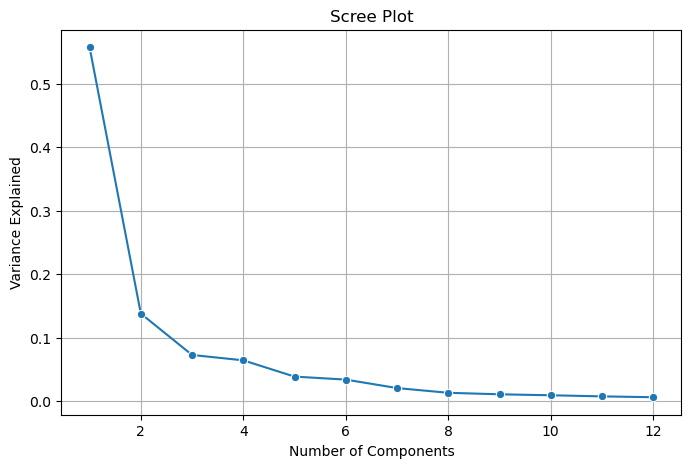

In [46]:
#Create a scree plot
plt.figure(figsize=(8,5))
sns.lineplot(y=pca.explained_variance_ratio_ ,x=range(1,13),marker='o')
plt.xlabel('Number of Components',fontsize=10)
plt.ylabel('Variance Explained',fontsize=10)
plt.title('Scree Plot',fontsize=12)
plt.grid()
plt.show()

In [47]:
#Check the cumlative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.55726063, 0.69510499, 0.76785794, 0.83212212, 0.87077261,
       0.9047243 , 0.92532669, 0.93848433, 0.94929292, 0.95854687,
       0.96607599, 0.97226701])

In [49]:
#Choose the PCs basis cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2', 'PC3', 'PC4', 'PC5','PC6']]

In [50]:
#Check the selected PCs
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465


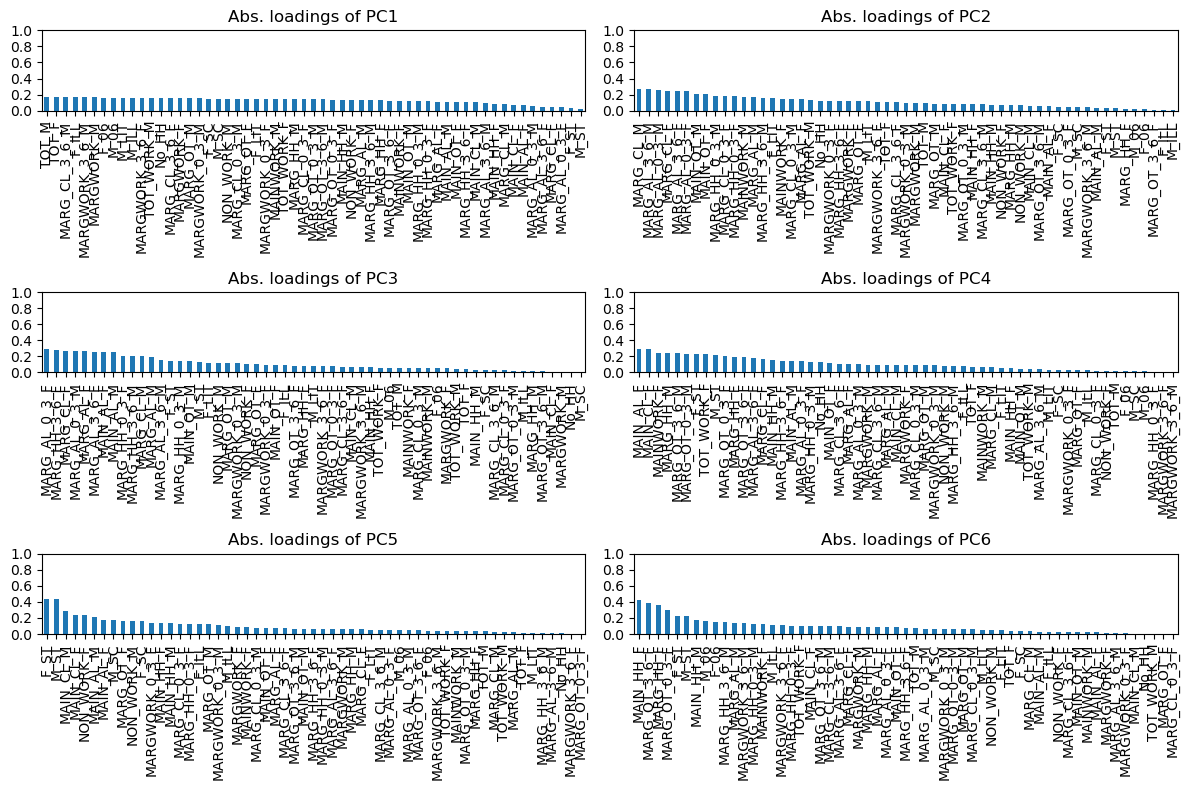

In [51]:
#Check as to how the original features matter to each PC
#Note: Here we are only considering the absolute values
plt.figure(figsize = (12,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

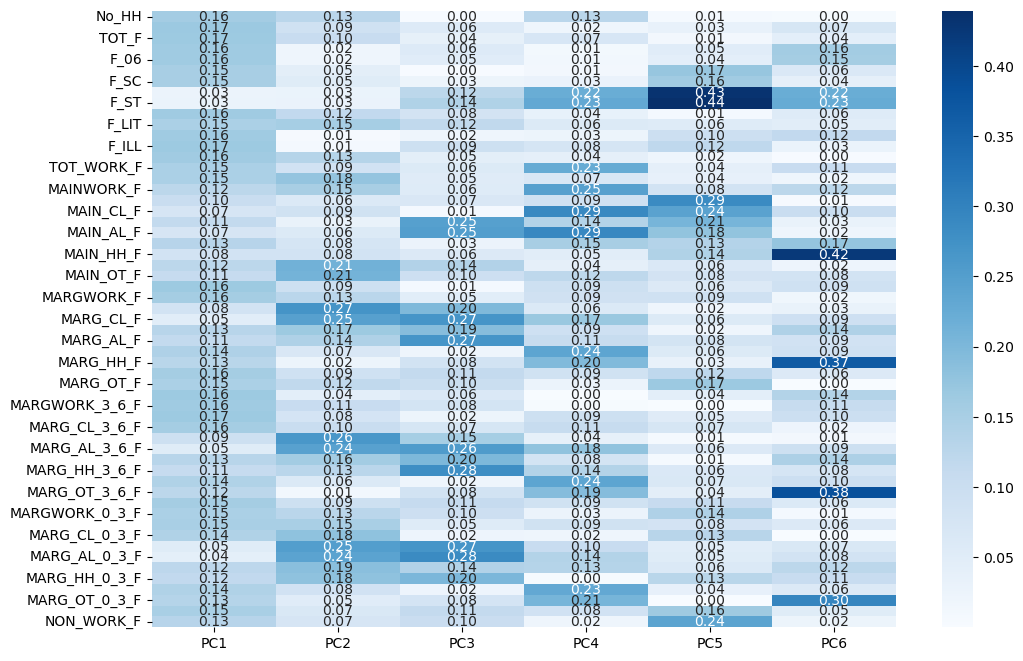

In [52]:
#Compare how the original features influence various PCs
plt.figure(figsize = (12,8))
sns.heatmap(abs(df_selected), annot = True, cmap = 'Blues',fmt = '.2f');

In [53]:
#In order to calculate PC scores we need loadings, below:
df_selected

,PC1,PC2,PC3,PC4,PC5,PC6
No_HH,0.156021,-0.126347,-0.002690,-0.125293,-0.007022,0.004083
TOT_M,0.167118,-0.089677,0.056698,-0.019942,-0.033026,-0.073389
TOT_F,0.165553,-0.104912,0.038749,-0.070873,-0.012847,-0.043647
M_06,0.162193,-0.022095,0.057788,0.011917,-0.050248,-0.157957
F_06,0.162566,-0.020271,0.050126,0.014844,-0.043848,-0.154436
M_SC,0.151358,-0.045111,0.002569,0.012485,-0.173007,-0.064295
F_SC,0.151567,-0.051924,-0.025101,-0.029893,-0.159803,-0.040518
M_ST,0.027234,0.027679,-0.123504,-0.222247,0.433163,0.222591
F_ST,0.028183,0.030223,-0.139769,-0.229754,0.438792,0.225531
M_LIT,0.161993,-0.115355,0.082168,-0.035163,-0.009101,-0.055465


In [54]:
#...and we need the original scaled features
df_pca_scaled.iloc[0]

No_HH            -0.904738
TOT_M            -0.771236
TOT_F            -0.815563
M_06             -0.561012
F_06             -0.507738
M_SC             -0.958575
F_SC             -0.957049
M_ST             -0.423306
F_ST             -0.476423
M_LIT            -0.798097
F_LIT            -0.733477
M_ILL            -0.604015
F_ILL            -0.798229
TOT_WORK_M       -0.859260
TOT_WORK_F       -1.010238
MAINWORK_M       -0.872367
MAINWORK_F       -0.898216
MAIN_CL_M        -1.042844
MAIN_CL_F        -0.986630
MAIN_AL_M        -0.851060
MAIN_AL_F        -0.683276
MAIN_HH_M        -0.630766
MAIN_HH_F        -0.407555
MAIN_OT_M        -0.624042
MAIN_OT_F        -0.611637
MARGWORK_M       -0.516943
MARGWORK_F       -0.966512
MARG_CL_M        -0.321809
MARG_CL_F        -0.485053
MARG_AL_M        -0.331426
MARG_AL_F        -0.860192
MARG_HH_M        -0.377984
MARG_HH_F        -0.453026
MARG_OT_M        -0.548764
MARG_OT_F        -0.614625
MARGWORK_3_6_M   -0.648040
MARGWORK_3_6_F   -0.663795
M

In [55]:
#We need to perform a dot product between the loadings and features to obtain the scores
for i in df_selected.columns:
    pc_score = np.dot(df_selected[i], df_pca_scaled.iloc[0])
    print(round(pc_score, 6), end = ' ')

-4.617263 0.138116 0.328545 1.543697 0.353737 -0.420947 

In [56]:
#Above step involves a lot of hard work. Let's do it the easier way
#Extract the required(as per the cumulative explained variance) number of PCs
pca = PCA(n_components=6, random_state=123)
pca_final = pca.fit_transform(df_pca_scaled)

In [57]:
#Just create a dataframe out of fit_transformed scaled data above
#Note: Notice the output of cell 34 and the first row of the dataframe below
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6
0,-4.617263,0.138116,0.328545,1.543697,0.353736,-0.420948
1,-4.771662,-0.105865,0.244449,1.963215,-0.153884,0.417308
2,-5.964836,-0.294347,0.367394,0.619543,0.478199,0.276581
3,-6.280796,-0.500384,0.212701,1.074515,0.300799,0.051157
4,-4.478566,0.894154,1.078277,0.535557,0.804065,0.341678
5,-3.319963,2.823865,3.058460,-0.447904,0.742445,0.634676
6,-5.021393,-0.346359,0.650378,0.981072,-0.059778,-0.246957
7,-4.608709,0.022370,0.398755,1.576995,0.171316,-0.139444
8,-5.186703,-0.059097,0.184397,1.735440,0.169174,0.455039
9,-4.226190,-1.335080,0.697838,1.470509,0.269146,-0.002576


In [58]:
# Assuming pca_final_df contains your PCA loadings data
# Get the loadings for PC1 (assuming PC1 is the first column in pca_final_df)
loadings_pc1 = pca_final_df.iloc[:, 0]

# Find the feature with the highest loading in PC1
feature_with_highest_loading_pc1 = loadings_pc1.idxmax()

# Print the feature name and its loading value
print(f"Feature with highest loading in PC1: {feature_with_highest_loading_pc1}")
print(f"Loading value: {loadings_pc1[feature_with_highest_loading_pc1]}")


Feature with highest loading in PC1: 334
Loading value: 26.284667499690755


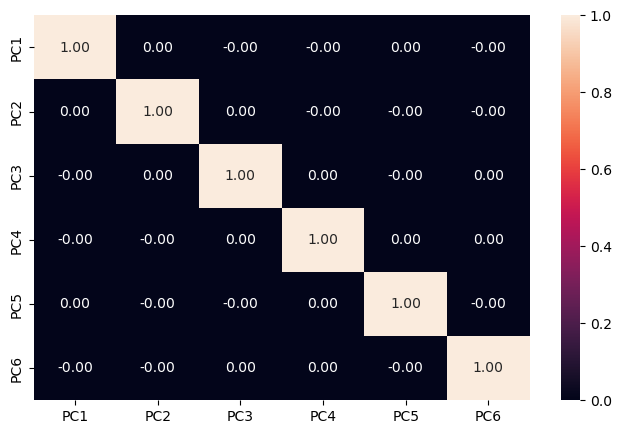

In [59]:
#Check for presence of correlations among  PCs
plt.figure(figsize = (8,5))
sns.heatmap(pca_final_df.corr(), annot=True,fmt='.2f');

Part 2 - PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

In [73]:
# Step 1: Calculate the variance explained by each PC
explained_variance_ratio = pca.explained_variance_ratio_

In [74]:
# Step 2: Create a DataFrame to store the variance explained by each PC
variance_explained_df = pd.DataFrame({
    'PC': range(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

In [78]:

pca_loadings = pca.components_

# Create a DataFrame to store the PCA loadings with original variable names
pca_loadings_df = pd.DataFrame(pca_loadings, columns=df_pca_scaled.columns)

# Display the PCA loadings DataFrame
print("PCA Loadings DataFrame:")
print(pca_loadings_df)


PCA Loadings DataFrame:
       No_HH     TOT_M     TOT_F          M_06          F_06          M_SC  \
0   0.156021  0.167118  0.165553  1.621929e-01  1.625664e-01  1.513578e-01   
1  -0.126347 -0.089677 -0.104912 -2.209451e-02 -2.027055e-02 -4.511090e-02   
2  -0.002690  0.056698  0.038749  5.778815e-02  5.012557e-02  2.568904e-03   
3  -0.125293 -0.019942 -0.070873  1.191717e-02  1.484420e-02  1.248510e-02   
4  -0.007022 -0.033026 -0.012847 -5.024751e-02 -4.384797e-02 -1.730067e-01   
5   0.004083 -0.073389 -0.043647 -1.579567e-01 -1.544358e-01 -6.429508e-02   
6  -0.118110  0.089554 -0.002124  1.650667e-01  1.690823e-01 -1.566169e-03   
7   0.057238  0.111431  0.088355  1.695953e-01  1.694585e-01 -1.293010e-01   
8   0.004265  0.018872  0.014911 -5.677290e-02 -5.932306e-02  3.748001e-02   
9   0.019985 -0.024501 -0.038041 -1.535742e-01 -1.695672e-01  4.485167e-01   
10  0.010592  0.011145  0.007734  8.125227e-02  8.196409e-02 -2.288206e-01   
11  0.086193  0.018850  0.093551  1.0435

In [85]:
# Assuming you have performed PCA and stored loadings in pca_loadings_df

# Step 1: Calculate the variance explained by each PC
explained_variance_ratio = pca.explained_variance_ratio_

# Step 2: Create a DataFrame to store the variance explained by each PC
variance_explained_df = pd.DataFrame({
    'PC': range(1, len(explained_variance_ratio) + 1),
    'Explained Variance Ratio': explained_variance_ratio
})

# Step 3: Sort PCs by explained variance in descending order
variance_explained_df = variance_explained_df.sort_values(by='Explained Variance Ratio', ascending=False)

# Step 4: Get the top 6 PCs with the highest variance
top_pcs = variance_explained_df.head(6)['PC']

# Step 5: Identify the original variables with the highest absolute loadings in each of the top 6 PCs
top_loadings = {}
for pc_num in top_pcs:
    pc_loadings = pca_loadings_df.iloc[pc_num - 1]
    top_loading_variable = pc_loadings.abs().idxmax()
    top_loadings[f'PC{pc_num}'] = top_loading_variable

# Step 6: Print the results and make inferences for the top 6 PCs
for pc_num, top_variable in top_loadings.items():
    print(f"PC{pc_num} explains the most variance and is associated with '{top_variable}'.")


PCPC1 explains the most variance and is associated with 'TOT_M'.
PCPC2 explains the most variance and is associated with 'MARG_CL_M'.
PCPC3 explains the most variance and is associated with 'MARG_AL_0_3_F'.
PCPC4 explains the most variance and is associated with 'MAIN_AL_F'.
PCPC5 explains the most variance and is associated with 'F_ST'.
PCPC6 explains the most variance and is associated with 'MAIN_HH_F'.


In [69]:
# Already performed PCA and have a PCA object named 'pca'

# Get the loadings (weights) for PC1
loadings_pc1 = pca.components_[0]

# List of original variables
variables = df_pca_scaled.columns  # Assuming data is your feature matrix

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame({'PC1 Loadings': loadings_pc1}, index=variables)

# Sort the DataFrame by absolute loadings (to see the strongest relationships)
loadings_df['Absolute Loadings'] = abs(loadings_df['PC1 Loadings'])
loadings_df = loadings_df.sort_values(by='Absolute Loadings', ascending=False)

# Print the DataFrame
print("Loadings for PC1:")
print(loadings_df)


Loadings for PC1:
                PC1 Loadings  Absolute Loadings
TOT_M               0.167118           0.167118
TOT_F               0.165553           0.165553
MARG_CL_3_6_M       0.165502           0.165502
F_ILL               0.165248           0.165248
MARGWORK_3_6_M      0.164972           0.164972
MARGWORK_M          0.164615           0.164615
F_06                0.162566           0.162566
M_06                0.162193           0.162193
M_LIT               0.161993           0.161993
M_ILL               0.161749           0.161749
MARGWORK_3_6_F      0.161253           0.161253
TOT_WORK_M          0.159872           0.159872
No_HH               0.156021           0.156021
MARG_CL_3_6_F       0.155647           0.155647
MARGWORK_F          0.155396           0.155396
MARG_OT_M           0.155263           0.155263
MARGWORK_0_3_M      0.154294           0.154294
F_SC                0.151567           0.151567
M_SC                0.151358           0.151358
NON_WORK_M          0.

In [61]:
# Sort the loadings and their corresponding variables
sorted_loadings_pc1 = sorted(zip(loadings_pc1, variables), key=lambda x: abs(x[0]), reverse=True)
print("\nSorted Loadings for PC1:")
for loading, variable in sorted_loadings_pc1:
    print(f"{variable}: {loading:.3f}")


Sorted Loadings for PC1:
TOT_M: 0.167
TOT_F: 0.166
MARG_CL_3_6_M: 0.166
F_ILL: 0.165
MARGWORK_3_6_M: 0.165
MARGWORK_M: 0.165
F_06: 0.163
M_06: 0.162
M_LIT: 0.162
M_ILL: 0.162
MARGWORK_3_6_F: 0.161
TOT_WORK_M: 0.160
No_HH: 0.156
MARG_CL_3_6_F: 0.156
MARGWORK_F: 0.155
MARG_OT_M: 0.155
MARGWORK_0_3_M: 0.154
F_SC: 0.152
M_SC: 0.151
NON_WORK_M: 0.150
MARG_CL_0_3_M: 0.150
MARG_OT_F: 0.147
F_LIT: 0.147
MARGWORK_0_3_F: 0.146
MAINWORK_M: 0.146
TOT_WORK_F: 0.146
MARG_HH_M: 0.141
MARG_CL_0_3_F: 0.140
MARG_OT_0_3_M: 0.140
MARG_OT_3_6_M: 0.140
MARG_OT_0_3_F: 0.132
MAIN_HH_M: 0.132
NON_WORK_F: 0.131
MARG_AL_M: 0.129
MARG_HH_3_6_M: 0.129
MARG_HH_F: 0.128
MARG_OT_3_6_F: 0.125
MAINWORK_F: 0.124
MAIN_OT_M: 0.124
MARG_HH_0_3_M: 0.122
MARG_HH_0_3_F: 0.116
MARG_AL_F: 0.114
MAIN_AL_M: 0.113
MAIN_OT_F: 0.111
MARG_HH_3_6_F: 0.111
MAIN_CL_M: 0.103
MARG_AL_3_6_M: 0.093
MAIN_HH_F: 0.083
MARG_CL_M: 0.082
MAIN_CL_F: 0.075
MAIN_AL_F: 0.074
MARG_AL_0_3_M: 0.053
MARG_AL_3_6_F: 0.052
MARG_CL_F: 0.049
MARG_AL_0_3_F: 0

Part 2 - PCA: Write linear equation for first PC.

In [63]:
import pandas as pd
from sklearn.decomposition import PCA

# Create a PCA object
pca = PCA()

# Fit the PCA model to your scaled data (replace 'df_pca_scaled' with your data)
pca.fit(df_pca_scaled)

# Extract the loadings of PC1 (first principal component)
loadings_pc1 = pca.components_[0]

# Create a DataFrame with 'PC1' as the column name and the loadings as values
df_extracted_loadings_pc1 = pd.DataFrame({'PC1': loadings_pc1}, index=df_pca_scaled.columns)


In [65]:
# Extract the loadings of PC1 (assuming you already have df_extracted_loadings_pc1)
loadings_pc1 = df_extracted_loadings_pc1['PC1']

# List of original variable names
variables = df_pca_scaled.columns

# Create the linear equation for PC1
linear_equation_pc1 = "PC1 = "
for i, variable in enumerate(variables):
    linear_equation_pc1 += f"{loadings_pc1[i]:.3f} * {variable}"
    if i < len(variables) - 1:
        linear_equation_pc1 += " + "

print("Linear Equation for PC1:")
print(linear_equation_pc1)


Linear Equation for PC1:
PC1 = 0.156 * No_HH + 0.167 * TOT_M + 0.166 * TOT_F + 0.162 * M_06 + 0.163 * F_06 + 0.151 * M_SC + 0.152 * F_SC + 0.027 * M_ST + 0.028 * F_ST + 0.162 * M_LIT + 0.147 * F_LIT + 0.162 * M_ILL + 0.165 * F_ILL + 0.160 * TOT_WORK_M + 0.146 * TOT_WORK_F + 0.146 * MAINWORK_M + 0.124 * MAINWORK_F + 0.103 * MAIN_CL_M + 0.075 * MAIN_CL_F + 0.113 * MAIN_AL_M + 0.074 * MAIN_AL_F + 0.132 * MAIN_HH_M + 0.083 * MAIN_HH_F + 0.124 * MAIN_OT_M + 0.111 * MAIN_OT_F + 0.165 * MARGWORK_M + 0.155 * MARGWORK_F + 0.082 * MARG_CL_M + 0.049 * MARG_CL_F + 0.129 * MARG_AL_M + 0.114 * MARG_AL_F + 0.141 * MARG_HH_M + 0.128 * MARG_HH_F + 0.155 * MARG_OT_M + 0.147 * MARG_OT_F + 0.165 * MARGWORK_3_6_M + 0.161 * MARGWORK_3_6_F + 0.166 * MARG_CL_3_6_M + 0.156 * MARG_CL_3_6_F + 0.093 * MARG_AL_3_6_M + 0.052 * MARG_AL_3_6_F + 0.129 * MARG_HH_3_6_M + 0.111 * MARG_HH_3_6_F + 0.140 * MARG_OT_3_6_M + 0.125 * MARG_OT_3_6_F + 0.154 * MARGWORK_0_3_M + 0.146 * MARGWORK_0_3_F + 0.150 * MARG_CL_0_3_M + 0.140